# EDA and Data Preprocessing

This notebook provides an exploratory data analysis on the arXiv dataset. The collection process is available here in [this notebook](00_arxiv_scraping.ipynb).

In [57]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/umair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/umair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
PATH_DATA_BASE = Path.cwd().parent / "data"

## Performing basic EDA

In this section, we first load the dataset into a pandas.Dataframe and then perform some basic exploratory data analysis (EDA).

In [60]:
# Setting pandas option to display the full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

arxiv_data = pd.read_csv(PATH_DATA_BASE / "data.csv")
arxiv_data.head()

,titles,abstracts,terms,urls
0,"A Survey on Deep Learning for Polyp Segmentation: Techniques, Challenges and Future Trends","Early detection and assessment of polyps play a crucial role in the\nprevention and treatment of colorectal cancer (CRC). Polyp segmentation\nprovides an effective solution to assist clinicians in accurately locating and\nsegmenting polyp regions. In the past, people often relied on manually\nextracted lower-level features such as color, texture, and shape, which often\nhad issues capturing global context and lacked robustness to complex scenarios.\nWith the advent of deep learning, more and more outstanding medical image\nsegmentation algorithms based on deep learning networks have emerged, making\nsignificant progress in this field. This paper provides a comprehensive review\nof polyp segmentation algorithms. We first review some traditional algorithms\nbased on manually extracted features and deep segmentation algorithms, then\ndetail benchmark datasets related to the topic. Specifically, we carry out a\ncomprehensive evaluation of recent deep learning models and results based on\npolyp sizes, considering the pain points of research topics and differences in\nnetwork structures. Finally, we discuss the challenges of polyp segmentation\nand future trends in this field. The models, benchmark datasets, and source\ncode links we collected are all published at\nhttps://github.com/taozh2017/Awesome-Polyp-Segmentation.",['cs.CV'],http://arxiv.org/abs/2311.18373v3
1,A Multi-Scale Feature Extraction and Fusion Deep Learning Method for Classification of Wheat Diseases,"Wheat is an important source of dietary fiber and protein that is negatively\nimpacted by a number of risks to its growth. The difficulty of identifying and\nclassifying wheat diseases is discussed with an emphasis on wheat loose smut,\nleaf rust, and crown and root rot. Addressing conditions like crown and root\nrot, this study introduces an innovative approach that integrates multi-scale\nfeature extraction with advanced image segmentation techniques to enhance\nclassification accuracy. The proposed method uses neural network models\nXception, Inception V3, and ResNet 50 to train on a large wheat disease\nclassification dataset 2020 in conjunction with an ensemble of machine vision\nclassifiers, including voting and stacking. The study shows that the suggested\nmethodology has a superior accuracy of 99.75% in the classification of wheat\ndiseases when compared to current state-of-the-art approaches. A deep learning\nensemble model Xception showed the highest accuracy.","['cs.CV', 'cs.LG']",http://arxiv.org/abs/2501.09938v1
2,"Image Segmentation with transformers: An Overview, Challenges and Future","Image segmentation, a key task in computer vision, has traditionally relied\non convolutional neural networks (CNNs), yet these models struggle with\ncapturing complex spatial dependencies, objects with varying scales, need for\nmanually crafted architecture components and contextual information. This paper\nexplores the shortcomings of CNN-based models and the shift towards transformer\narchitectures -to overcome those limitations. This work reviews\nstate-of-the-art transformer-based segmentation models, addressing\nsegmentation-specific challenges and their solutions. The paper discusses\ncurrent challenges in transformer-based segmentation and outlines promising\nfuture trends, such as lightweight architectures and enhanced data efficiency.\nThis survey serves as a guide for understanding the impact of transformers in\nadvancing segmentation capabilities and overcoming the limitations of\ntraditional models.",['cs.CV'],http://arxiv.org/abs/2501.09372v1
3,Shape-Based Single Object Classification Using Ensemble Method Classifiers,"Nowadays, more and more images are available. Annotation and retrieval of the\nimages pose classification problems, where each class is defined as the group\nof database images labelled with a common semantic label. Vari

In [61]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 983 rows in the dataset.


Real-world data is noisy. One of the most commonly observed source of noise is data duplication. Here we notice that our initial dataset has got about 17k duplicate entries.

In [62]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 218 duplicate titles.


Note that the 'terms' column is a string representation of a list. We are converting it to a list using the ast.literal_eval function.

In [63]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
arxiv_data.head()

,titles,abstracts,terms,urls
0,"A Survey on Deep Learning for Polyp Segmentation: Techniques, Challenges and Future Trends","Early detection and assessment of polyps play a crucial role in the\nprevention and treatment of colorectal cancer (CRC). Polyp segmentation\nprovides an effective solution to assist clinicians in accurately locating and\nsegmenting polyp regions. In the past, people often relied on manually\nextracted lower-level features such as color, texture, and shape, which often\nhad issues capturing global context and lacked robustness to complex scenarios.\nWith the advent of deep learning, more and more outstanding medical image\nsegmentation algorithms based on deep learning networks have emerged, making\nsignificant progress in this field. This paper provides a comprehensive review\nof polyp segmentation algorithms. We first review some traditional algorithms\nbased on manually extracted features and deep segmentation algorithms, then\ndetail benchmark datasets related to the topic. Specifically, we carry out a\ncomprehensive evaluation of recent deep learning models and results based on\npolyp sizes, considering the pain points of research topics and differences in\nnetwork structures. Finally, we discuss the challenges of polyp segmentation\nand future trends in this field. The models, benchmark datasets, and source\ncode links we collected are all published at\nhttps://github.com/taozh2017/Awesome-Polyp-Segmentation.",[cs.CV],http://arxiv.org/abs/2311.18373v3
1,A Multi-Scale Feature Extraction and Fusion Deep Learning Method for Classification of Wheat Diseases,"Wheat is an important source of dietary fiber and protein that is negatively\nimpacted by a number of risks to its growth. The difficulty of identifying and\nclassifying wheat diseases is discussed with an emphasis on wheat loose smut,\nleaf rust, and crown and root rot. Addressing conditions like crown and root\nrot, this study introduces an innovative approach that integrates multi-scale\nfeature extraction with advanced image segmentation techniques to enhance\nclassification accuracy. The proposed method uses neural network models\nXception, Inception V3, and ResNet 50 to train on a large wheat disease\nclassification dataset 2020 in conjunction with an ensemble of machine vision\nclassifiers, including voting and stacking. The study shows that the suggested\nmethodology has a superior accuracy of 99.75% in the classification of wheat\ndiseases when compared to current state-of-the-art approaches. A deep learning\nensemble model Xception showed the highest accuracy.","[cs.CV, cs.LG]",http://arxiv.org/abs/2501.09938v1
2,"Image Segmentation with transformers: An Overview, Challenges and Future","Image segmentation, a key task in computer vision, has traditionally relied\non convolutional neural networks (CNNs), yet these models struggle with\ncapturing complex spatial dependencies, objects with varying scales, need for\nmanually crafted architecture components and contextual information. This paper\nexplores the shortcomings of CNN-based models and the shift towards transformer\narchitectures -to overcome those limitations. This work reviews\nstate-of-the-art transformer-based segmentation models, addressing\nsegmentation-specific challenges and their solutions. The paper discusses\ncurrent challenges in transformer-based segmentation and outlines promising\nfuture trends, such as lightweight architectures and enhanced data efficiency.\nThis survey serves as a guide for understanding the impact of transformers in\nadvancing segmentation capabilities and overcoming the limitations of\ntraditional models.",[cs.CV],http://arxiv.org/abs/2501.09372v1
3,Shape-Based Single Object Classification Using Ensemble Method Classifiers,"Nowadays, more and more images are available. Annotation and retrieval of the\nimages pose classification problems, where each class is defined as the group\nof database images labelled with a common semantic label. Various syst

### Distribution of Terms

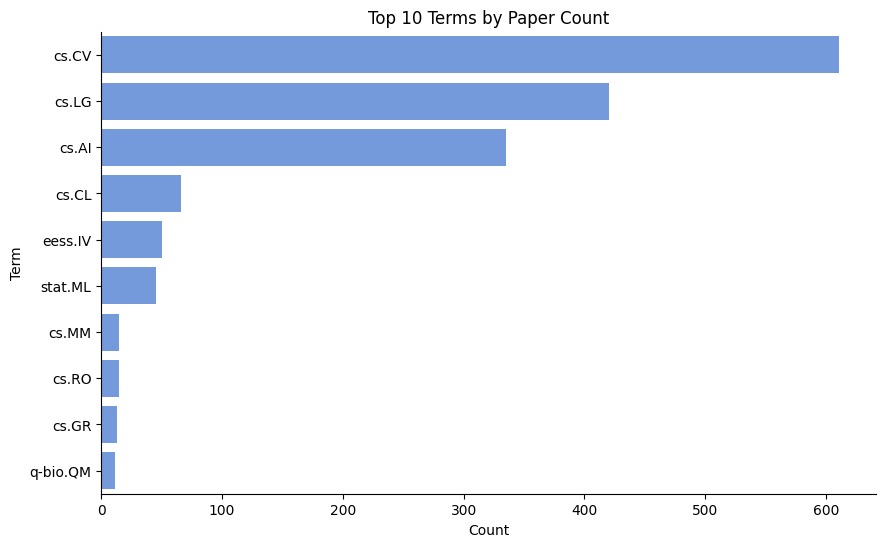

In [64]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='cornflowerblue')

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

### Word Cloud of Titles

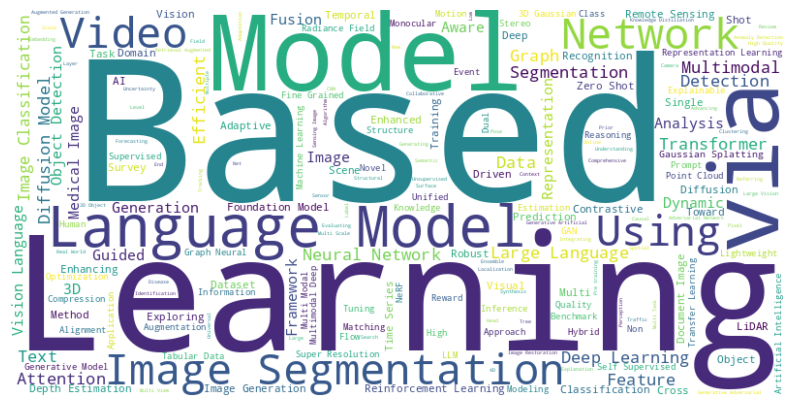

In [65]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Before proceeding further, we drop these entries.

In [66]:
arxiv_data = arxiv_data[~arxiv_data["titles"].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")

There are 765 rows in the deduplicated dataset.


In [67]:
arxiv_data.to_csv(PATH_DATA_BASE / 'filtered_data.csv', index=False)

## Approaches

We will be testing two approaches to recommend papers to a user.


- The first approach is a content-based approach, where we will be recommending papers based on the similarity of their titles.
- The second approach is also a content-based approach but we will be recommending papers based on the similarity of their abstract.

### Content-based approach using titles

Let's us start by exploring the first approach.

Since we are using the titles of the papers to recommend similar papers, we can drop the other columns.

In [68]:
titles_dataset = arxiv_data.drop(columns = ["abstracts"])

In [69]:
titles_dataset.head()

,titles,terms,urls
0,"A Survey on Deep Learning for Polyp Segmentation: Techniques, Challenges and Future Trends",[cs.CV],http://arxiv.org/abs/2311.18373v3
1,A Multi-Scale Feature Extraction and Fusion Deep Learning Method for Classification of Wheat Diseases,"[cs.CV, cs.LG]",http://arxiv.org/abs/2501.09938v1
2,"Image Segmentation with transformers: An Overview, Challenges and Future",[cs.CV],http://arxiv.org/abs/2501.09372v1
3,Shape-Based Single Object Classification Using Ensemble Method Classifiers,"[cs.CV, cs.AI, cs.CL]",http://arxiv.org/abs/2501.09311v1
4,Few-Shot Adaptation of Training-Free Foundation Model for 3D Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2501.09138v1


In [70]:
average_title_length = int(titles_dataset['titles'].apply(len).mean())
print(f"The average text length of a title is {average_title_length} characters.")

The average text length of a title is 82 characters.


In [71]:
# Calculate the length of each title
titles_dataset['title_length'] = titles_dataset['titles'].apply(len)

In [72]:
# Calculate the min and max length
min_length = titles_dataset['title_length'].min()
max_length = titles_dataset['title_length'].max()

print('The minimum length of a title:', min_length)
print('The maximum length of a title:', max_length)

The minimum length of a title: 22
The maximum length of a title: 171


In [73]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame. 
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """
    
    # Compute the lengths of all titles
    title_lengths = df[column_name].apply(len)

    # Calculate mean and standard deviation
    mean_length = title_lengths.mean()
    std_length = title_lengths.std()

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(title_lengths, bins=50, color='b', alpha=0.2)

    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray',
                linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='gray',
                linestyle='--', linewidth=1)

    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()
             [1]*0.9, f"Mean: {mean_length:.2f}", fontsize=10)

    plt.title('Distribution of ' + column_name.capitalize() + ' Lengths')
    plt.xlabel(column_name.capitalize() + ' Length')
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [74]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens 
    and stop words, counts the frequency of each word, and then plots the 10 most common words 
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """
    
    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(10,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')
    
    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

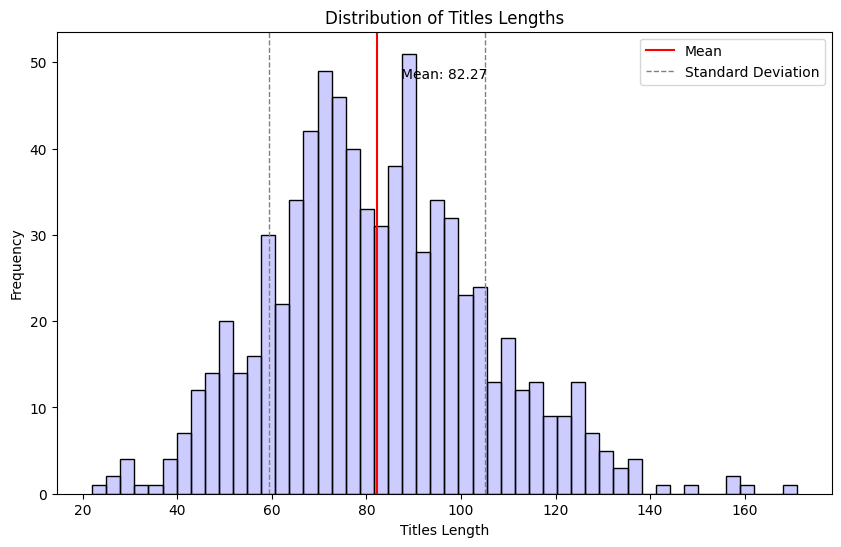

In [75]:
plot_length_distribution(titles_dataset, 'titles')

In [76]:
# plot_top_words(titles_dataset, 'titles')

### Content-based approach using abstracts

Let's us now explore the second approach.

We will be dropping the title column and keeping the abstract column.

In [77]:
abstracts_dataset = arxiv_data.drop(columns = ["titles"])

In [78]:
abstracts_dataset.head()

,abstracts,terms,urls
0,"Early detection and assessment of polyps play a crucial role in the\nprevention and treatment of colorectal cancer (CRC). Polyp segmentation\nprovides an effective solution to assist clinicians in accurately locating and\nsegmenting polyp regions. In the past, people often relied on manually\nextracted lower-level features such as color, texture, and shape, which often\nhad issues capturing global context and lacked robustness to complex scenarios.\nWith the advent of deep learning, more and more outstanding medical image\nsegmentation algorithms based on deep learning networks have emerged, making\nsignificant progress in this field. This paper provides a comprehensive review\nof polyp segmentation algorithms. We first review some traditional algorithms\nbased on manually extracted features and deep segmentation algorithms, then\ndetail benchmark datasets related to the topic. Specifically, we carry out a\ncomprehensive evaluation of recent deep learning models and results based on\npolyp sizes, considering the pain points of research topics and differences in\nnetwork structures. Finally, we discuss the challenges of polyp segmentation\nand future trends in this field. The models, benchmark datasets, and source\ncode links we collected are all published at\nhttps://github.com/taozh2017/Awesome-Polyp-Segmentation.",[cs.CV],http://arxiv.org/abs/2311.18373v3
1,"Wheat is an important source of dietary fiber and protein that is negatively\nimpacted by a number of risks to its growth. The difficulty of identifying and\nclassifying wheat diseases is discussed with an emphasis on wheat loose smut,\nleaf rust, and crown and root rot. Addressing conditions like crown and root\nrot, this study introduces an innovative approach that integrates multi-scale\nfeature extraction with advanced image segmentation techniques to enhance\nclassification accuracy. The proposed method uses neural network models\nXception, Inception V3, and ResNet 50 to train on a large wheat disease\nclassification dataset 2020 in conjunction with an ensemble of machine vision\nclassifiers, including voting and stacking. The study shows that the suggested\nmethodology has a superior accuracy of 99.75% in the classification of wheat\ndiseases when compared to current state-of-the-art approaches. A deep learning\nensemble model Xception showed the highest accuracy.","[cs.CV, cs.LG]",http://arxiv.org/abs/2501.09938v1
2,"Image segmentation, a key task in computer vision, has traditionally relied\non convolutional neural networks (CNNs), yet these models struggle with\ncapturing complex spatial dependencies, objects with varying scales, need for\nmanually crafted architecture components and contextual information. This paper\nexplores the shortcomings of CNN-based models and the shift towards transformer\narchitectures -to overcome those limitations. This work reviews\nstate-of-the-art transformer-based segmentation models, addressing\nsegmentation-specific challenges and their solutions. The paper discusses\ncurrent challenges in transformer-based segmentation and outlines promising\nfuture trends, such as lightweight architectures and enhanced data efficiency.\nThis survey serves as a guide for understanding the impact of transformers in\nadvancing segmentation capabilities and overcoming the limitations of\ntraditional models.",[cs.CV],http://arxiv.org/abs/2501.09372v1
3,"Nowadays, more and more images are available. Annotation and retrieval of the\nimages pose classification problems, where each class is defined as the group\nof database images labelled with a common semantic label. Various systems have\nbeen proposed for content-based retrieval, as well as for image classification\nand indexing. In this paper, a hierarchical classification framework has been\nproposed for bridging the semantic gap effectively and achieving multi-category\nimage classification. A well known pre-processing and post-processing method\nwas used and applied to 

In [79]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f"The average text length of an abstract is {average_abstract_length} characters.")

The average text length of an abstract is 1363 characters.


In [80]:
# Calculate the length of each abstract
abstracts_dataset['abstract_length'] = abstracts_dataset['abstracts'].apply(len)

In [81]:
# Calculate the min and max length
min_length = abstracts_dataset['abstract_length'].min()
max_length = abstracts_dataset['abstract_length'].max()

print('The minimum length of an abstract:', min_length)
print('The maximum length of an abstract:', max_length)

The minimum length of an abstract: 459
The maximum length of an abstract: 1920


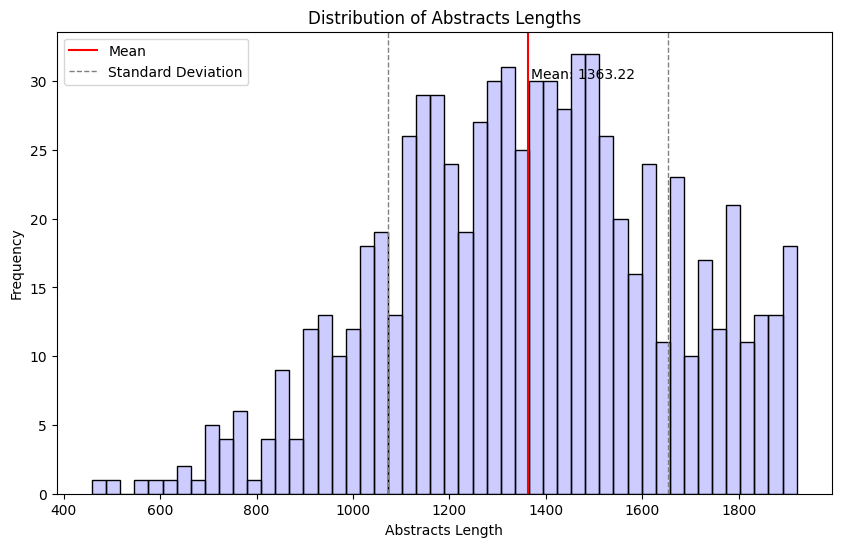

In [82]:
plot_length_distribution(abstracts_dataset, 'abstracts')

In [83]:
# plot_top_words(abstracts_dataset, 'abstracts')

## Observations

The average text length of an abstract is 1237 characters, and its maximum length is 2790 characters. So the best choice is to use a sentence-transformer model with a Max Sequence Length capability of over 2790 characters.

Unfortunately, most pre-trained models have a Max Sequence Length of 512. The transformer model just won't be able to process the entire abstract at once due to its max length constraint, so it processes as much as it can, which in this case is the first 512 words.

A naive approach would be to split the document into chunks, encode each chunk separately and then combine these encodings for a final document-level representation. For example, split a document into sentences, encode each sentence independently and then combine these sentence vectors (e.g., averaging, max-pooling, etc.) for a document representation.

Another approach would be to use a "sliding window". Instead of just taking the first 512 words, I could apply a "sliding window" approach where I first process the first 512 words, then the next 512 words (perhaps with some overlap), and so on until I've processed the whole abstract.

I will first be encoding paper's titles to calculate the similarity. Abstracts will be encoded later on.